In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
pd.set_option('display.max_columns', None)

In [288]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [289]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ambience lagoon,sector 24,4.25,13281.0,3200.0,super built up area 3200(297.29 sq.m.)carpet a...,3,4,3+,3.0,North-East,Old Property,3200.0,NaN,3156.000000,0,1,0,1,0,1,143
1,flat,capital residences 360,sector 70,1.18,8137.0,1450.0,super built up area 1450(134.71 sq.m.)built up...,2,2,3,7.0,East,New Property,1450.0,1400.0,1000.000000,0,0,0,1,0,0,140
2,flat,umang winter hills,sector 77,0.71,5305.0,1338.0,super built up area 1342(124.68 sq.m.)carpet a...,2,2,2,6.0,North-West,Relatively New,1342.0,NaN,810.000000,1,0,0,0,0,0,108
3,flat,rof ananda,sector 95,0.20,5463.0,366.0,carpet area: 366.08 (34.01 sq.m.),1,1,1,10.0,West,Relatively New,NaN,NaN,366.080239,0,0,0,0,0,0,82
4,flat,shree vardhman flora,sector 90,0.90,4615.0,1950.0,super built up area 1950(181.16 sq.m.),3,4,3,4.0,East,Relatively New,1950.0,NaN,NaN,0,1,0,0,0,0,165


In [290]:
# two major ways to do outlier detection
# 1. if distribution is normal -> emperical rule
# 2. non normal distribution -> box plot

In [291]:
df.shape

(3825, 23)

<ipython-input-292-acde86786b5c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']) # not normal


<Axes: xlabel='price', ylabel='Density'>

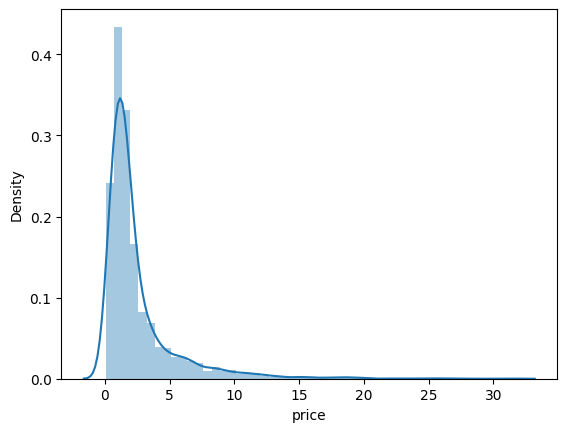

In [292]:
sns.distplot(df['price']) # not normal

<Axes: xlabel='price'>

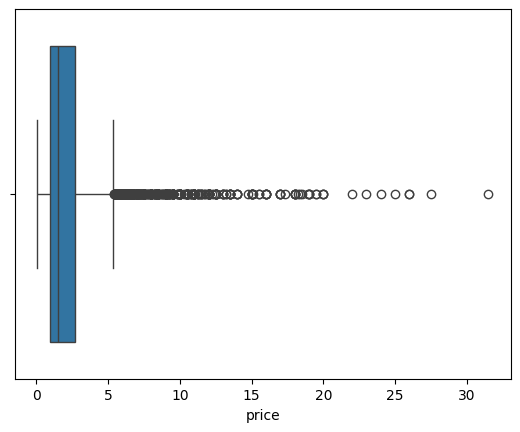

In [293]:
sns.boxplot(x=df['price'])

In [294]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(434,
 count    434.000000
 mean       9.194908
 std        4.051916
 min        5.400000
 25%        6.400000
 50%        8.000000
 75%       10.557500
 max       31.500000
 Name: price, dtype: float64)

In [295]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3291,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.000000,plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
2919,house,independent,sector 43,27.50,24366.0,11286.218501,plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2293,house,dlf city plots,sector 26,26.00,57206.0,4544.977800,plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
3436,house,independent,sector 26,26.00,82540.0,3149.987885,plot area 402(336.12 sq.m.)built up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
2964,house,suncity township,sector 54,25.00,31111.0,8035.742985,plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
2165,house,emaar the palm springs,sector 54,24.00,600000.0,400.000000,plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
2167,house,independent,sector 26,23.00,25556.0,8999.843481,plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
1159,house,vipul tatvam villa,sector 48,22.00,26667.0,8249.896876,plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,1,54
87,house,dlf city plots,sector 26,20.00,44265.0,4518.242404,plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
2490,house,independent,sector 26,20.00,44444.0,4500.045000,plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97


In [296]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

<Axes: xlabel='price_per_sqft', ylabel='Density'>

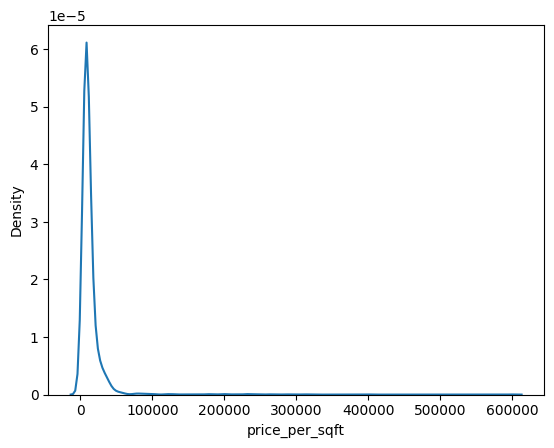

In [297]:
sns.kdeplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

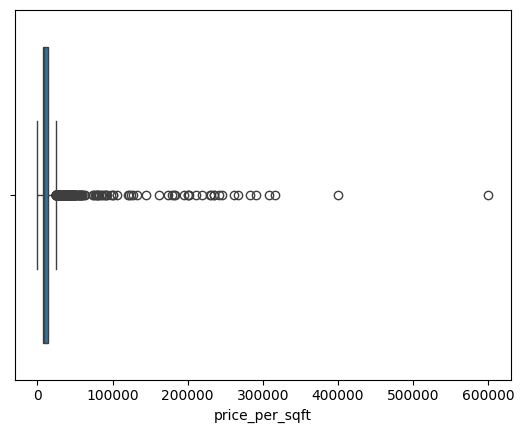

In [298]:
sns.boxplot(x=df['price_per_sqft'])

In [299]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(369,
 count       369.000000
 mean      52555.639566
 std       60880.005832
 min       24202.000000
 25%       27778.000000
 50%       33333.000000
 75%       41833.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [300]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x) # based on observation in excel file

<ipython-input-300-397cdab04ece>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x) # based on observation in excel file


In [301]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

<ipython-input-301-f07934424e06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [302]:
outliers_sqft['price_per_sqft'].describe()

,price_per_sqft
count,369.000000
mean,29082.991870
std,12320.569969
min,2689.000000
25%,25000.000000
50%,29545.000000
75%,35484.000000
max,82540.000000


In [303]:
df.update(outliers_sqft)

<ipython-input-304-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

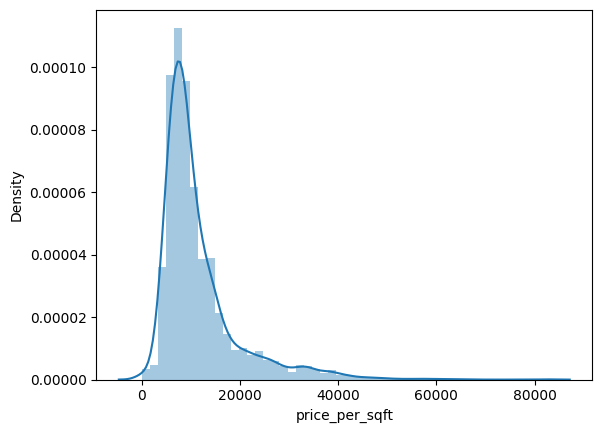

In [304]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

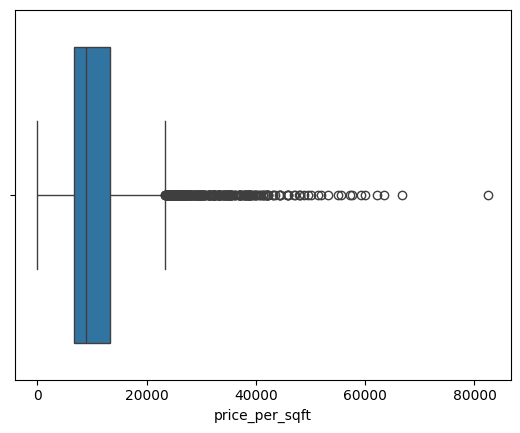

In [305]:
sns.boxplot(x=df['price_per_sqft'])

In [306]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
174,house,nul,sector 28,12.50,51440.0,2430.015552,plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,2,137
186,house,emaar mgf marbella,sector 66,18.00,55556.0,3239.974080,plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,2,75
1115,house,project housing board colony,sector 31,8.00,63492.0,1260.001260,built up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
1197,flat,unitech vistas,sector 70,9.00,57508.0,1565.000000,built up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
1299,house,malibu towne,sector 47,8.50,53125.0,1600.000000,built up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99
2165,house,emaar the palm springs,sector 54,24.00,66667.0,3600.000000,plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
2293,house,dlf city plots,sector 26,26.00,57206.0,4544.977800,plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
2493,house,cloudnine cottages,sohna,5.50,55000.0,1000.000000,plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0
3336,house,independent,sector 25,16.00,59259.0,2700.011813,plot area 350(292.64 sq.m.)built up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
3436,house,independent,sector 26,26.00,82540.0,3149.987885,plot area 402(336.12 sq.m.)built up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72


In [307]:
df = df[df['price_per_sqft'] <= 50000] # removing outliers

<Axes: xlabel='price_per_sqft'>

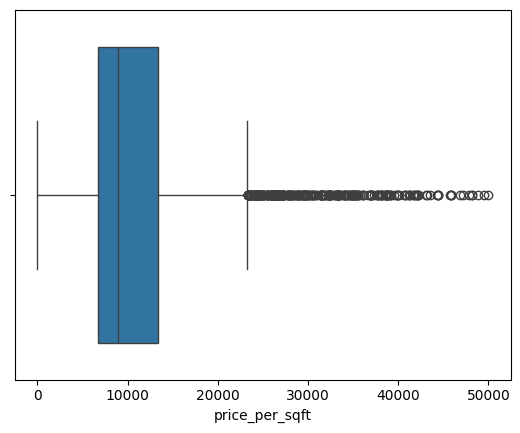

In [308]:
sns.boxplot(x=df['price_per_sqft'])

<ipython-input-309-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

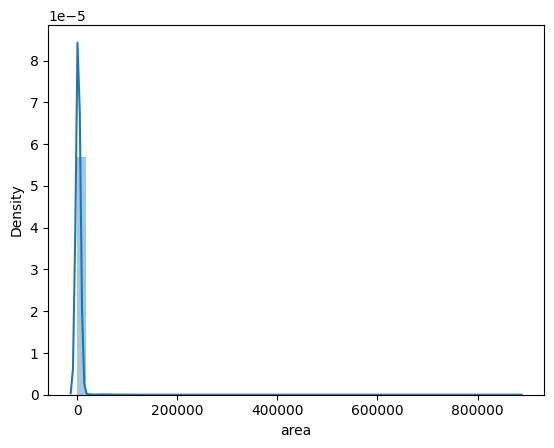

In [309]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

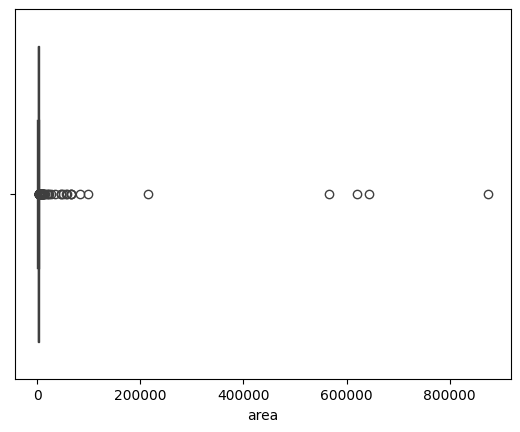

In [310]:
sns.boxplot(x=df['area'])

In [311]:
df['area'].describe()

,area
count,3794.000000
mean,2907.002714
std,22759.686867
min,145.006344
25%,1250.000000
50%,1744.000000
75%,2340.024609
max,875000.000000


In [312]:
df[df['area'] > 100000] # prices are low but area is high

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
69,flat,ramsons kshitij,sector 95,0.31,5.0,620000.000000,carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
306,flat,signature global solera 2,sector 107,0.51,9.0,566667.000000,carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
1862,flat,hcbs sports ville,sohna,0.35,4.0,875000.000000,built up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
3577,flat,signature the roselia,sector 95,0.45,7.0,642857.000000,carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
3643,house,independent,sector 50,5.00,232.0,215517.241379,plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,NaN,NaN,1,1,0,1,1,0,0


In [313]:
df = df[df['area'] < 100000]

<ipython-input-314-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

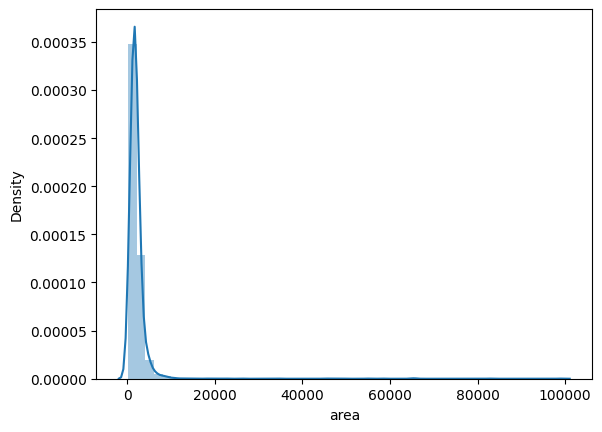

In [314]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

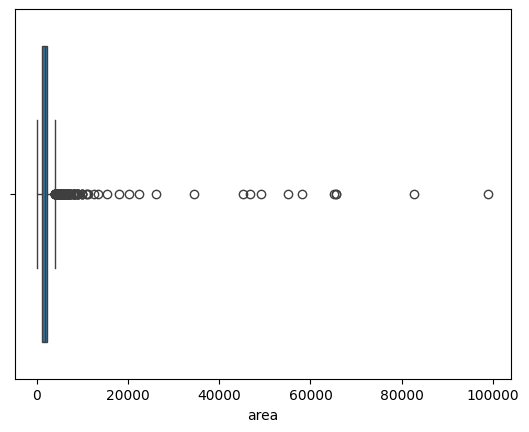

In [315]:
sns.boxplot(x=df['area'])

In [316]:
df[df['area'] > 10000].sort_values('area',ascending=False)
# rows to remove -> 1609, 2585, 2699, 653, 2973, 856, 2349, 3220, 3181

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1609,house,independent,sector 26,18.40,1859.0,98977.945132,plot area 502(419.74 sq.m.)carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
2370,house,ganpati heights apartment,sector 13,1.25,151.0,82781.456954,plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
2585,flat,rof ananda,sector 95,0.38,58.0,65517.000000,carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
2699,flat,rof ananda,sector 95,0.38,58.0,65517.000000,carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
3433,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.044177,carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
653,flat,pyramid elite,sector 86,0.46,79.0,58228.000000,carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
2973,flat,rof ananda,sector 95,0.33,60.0,55000.000000,carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
856,flat,signature the serenas,sohna,0.28,57.0,49123.000000,carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
3276,house,independent,sector 25,7.30,1560.0,46794.871795,plot area 215(179.77 sq.m.)built up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
2349,flat,ramsons kshitij,sector 95,0.24,53.0,45283.000000,carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [317]:
df.drop(index = [1609, 2585, 2699, 653, 2973, 856, 2349, 3220, 3181], inplace = True)

In [318]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2370,house,ganpati heights apartment,sector 13,1.25,151.0,82781.456954,plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
3433,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.044177,carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
3276,house,independent,sector 25,7.30,1560.0,46794.871795,plot area 215(179.77 sq.m.)built up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
1493,house,independent,sector 5,1.45,557.0,26032.315978,plot area 26000(2415.48 sq.m.),4,4,2,2.0,East,Moderately Old,NaN,26000.0,NaN,0,1,0,1,0,0,62
2676,house,independent,sector 57,6.25,2778.0,22498.200144,plot area 3100(2591.99 sq.m.)built up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,1,61
2700,house,independent,sector 43,5.50,2716.0,20250.368189,plot area 215(179.77 sq.m.)built up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,1,123
519,flat,godrej air,sector 85,2.50,1379.0,18129.000000,carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,1,44
2497,house,unitech aspen greens,sector 50,6.95,4490.0,15478.841871,plot area 240(200.67 sq.m.)built up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
926,flat,godrej icon,sector 88,1.75,1384.0,12645.000000,carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
2919,house,independent,sector 43,27.50,24366.0,11286.218501,plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


In [319]:
# fix data errors
df.loc[2370,'area'] = 115*9
df.loc[3433,'area'] = 7250
df.loc[3276,'area'] = 5800
df.loc[1493,'area'] = 2660
df.loc[2676,'area'] = 2850
df.loc[2700,'area'] = 1812
df.loc[519,'area'] = 2160
df.loc[2497,'area'] = 1175

<ipython-input-320-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

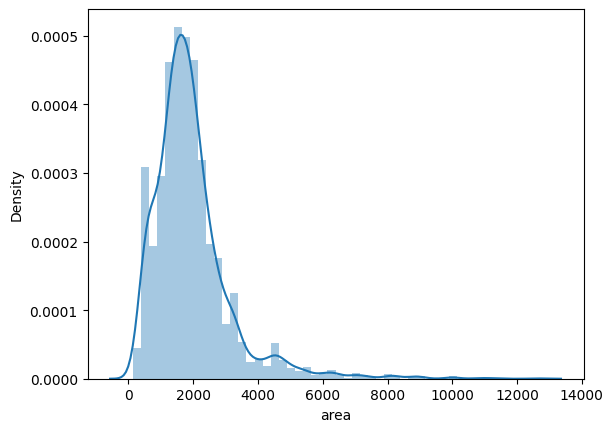

In [320]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

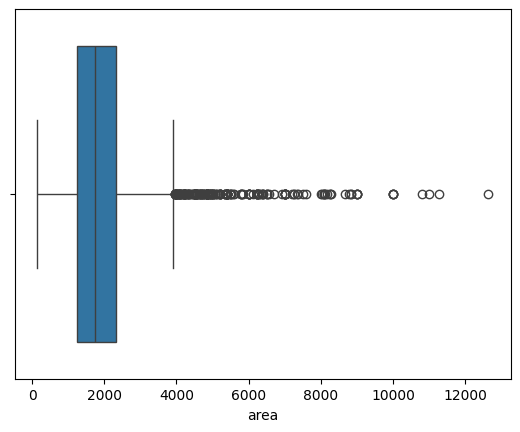

In [321]:
sns.boxplot(x=df['area'])

In [322]:
df['area'].describe()

,area
count,3780.000000
mean,1944.729880
std,1230.677733
min,145.006344
25%,1250.000000
50%,1741.000000
75%,2320.000000
max,12645.000000


<ipython-input-323-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

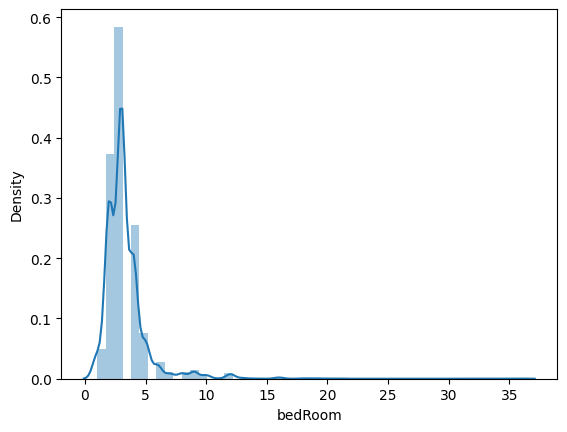

In [323]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

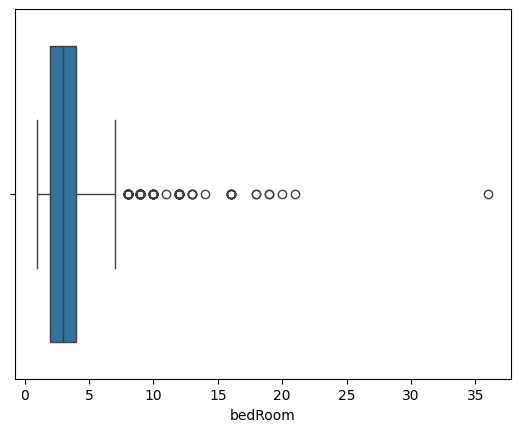

In [324]:
sns.boxplot(x=df['bedRoom'])

In [325]:
df['bedRoom'].describe()

,bedRoom
count,3780.000000
mean,3.320370
std,1.885659
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,36.000000


In [326]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1742,house,independent,sector 13,2.25,6944.0,3240.207373,plot area 360(301.01 sq.m.),36,36,2,3.0,East,Moderately Old,NaN,3240.0,NaN,0,1,0,0,0,0,7
3099,house,independent,sector 54,5.00,43066.0,1161.008684,plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
1389,house,independent,sector 43,4.50,39062.0,1152.014746,plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
344,house,independent,sector 17,3.87,5160.0,7500.000000,plot area 1623(150.78 sq.m.)built up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
1121,house,independent,sector 17,3.93,24214.0,1623.028000,plot area 1623(150.78 sq.m.)built up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
2257,house,independent,sector 54,5.50,38194.0,1440.016757,plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
3675,house,private house,sector 55,7.05,46906.0,1503.006012,plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
1394,house,independent,sector 43,13.50,50000.0,2700.000000,plot area 300(250.84 sq.m.),16,16,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1,1,0,1,1,0,41
2234,house,independent,sector 11,4.50,25000.0,1800.000000,plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,1,20
1773,house,luxury dlf city floors,sector 26,20.00,48889.0,4090.899793,plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31


In [327]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False).shape

(46, 23)

In [328]:
df = df[df['bedRoom'] <= 10]

In [329]:
df.shape

(3734, 23)

<ipython-input-330-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

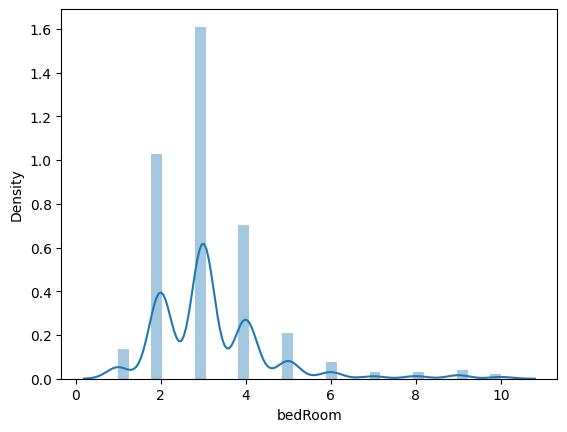

In [330]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

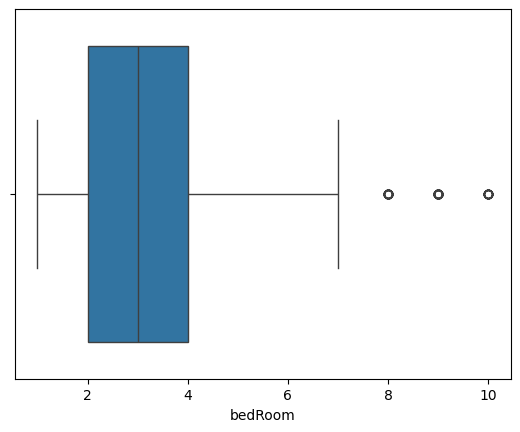

In [331]:
sns.boxplot(x=df['bedRoom'])

In [332]:
df['bedRoom'].describe()

,bedRoom
count,3734.000000
mean,3.186663
std,1.384629
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,10.000000


<ipython-input-333-6f8990f100b4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

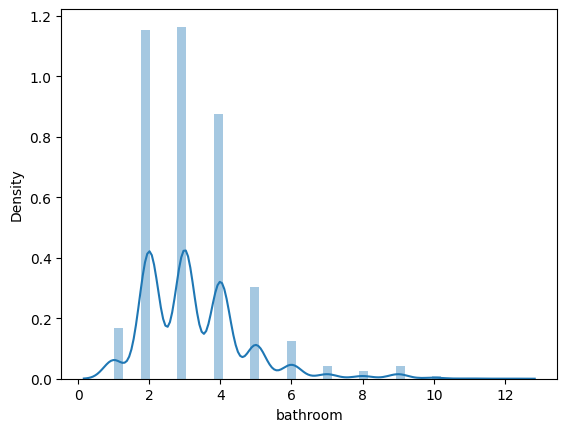

In [333]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

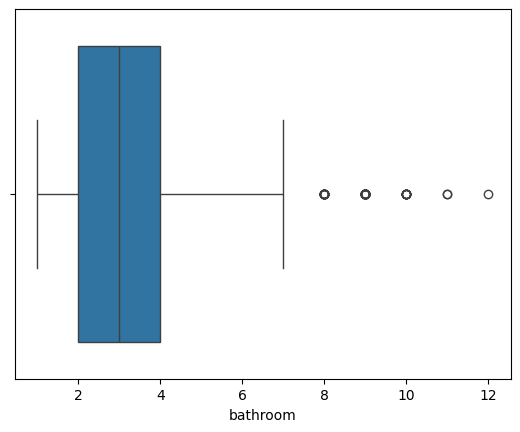

In [334]:
sns.boxplot(x=df['bathroom'])

In [335]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False) # logical

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1494,house,adani brahma samsara,sector 60,18.02,28200.0,6390.070922,built up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
212,house,independent,sector 39,7.00,10000.0,7000.000000,plot area 350(32.52 sq.m.)built up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38
263,house,independent,sector 24,11.00,28898.0,3806.491799,plot area 3806.45(353.63 sq.m.)built up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39


<ipython-input-336-ce4cb092a62b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

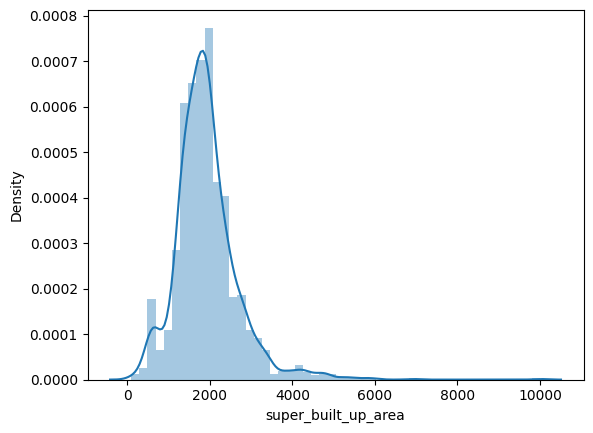

In [336]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

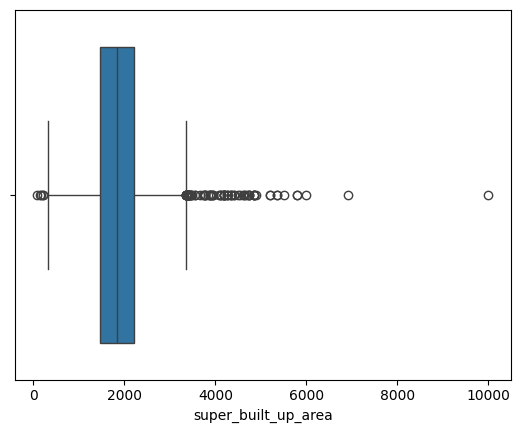

In [337]:
sns.boxplot(x=df['super_built_up_area'])

In [338]:
df['super_built_up_area'].describe()

,super_built_up_area
count,1916.000000
mean,1920.960621
std,767.567514
min,89.000000
25%,1457.000000
50%,1827.750000
75%,2215.000000
max,10000.000000


In [339]:
df[df['super_built_up_area'] > 6000] # logical outliers

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
628,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,super built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49
1206,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,super built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140


<ipython-input-340-7e13bd12b627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

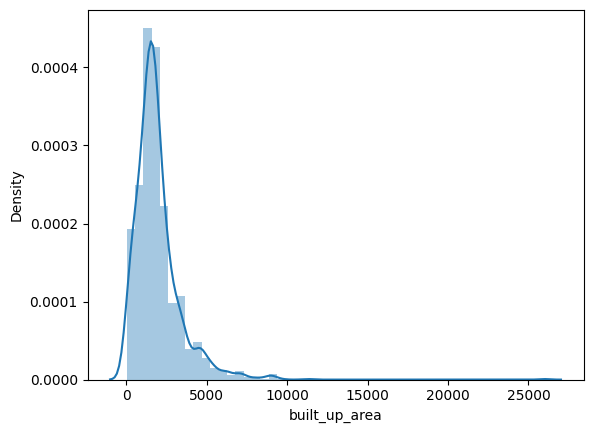

In [340]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

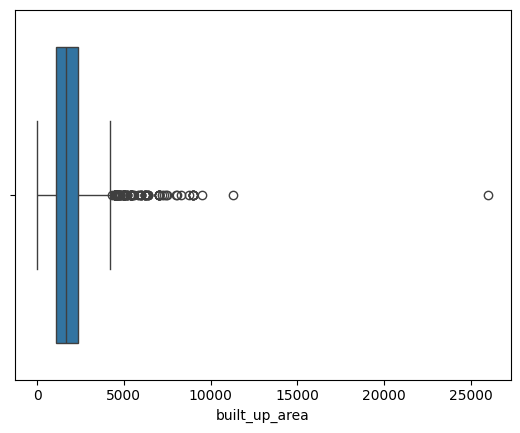

In [341]:
sns.boxplot(x=df['built_up_area'])

In [342]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1493,house,independent,sector 5,1.45,557.0,2660.000000,plot area 26000(2415.48 sq.m.),4,4,2,2.0,East,Moderately Old,NaN,26000.0,NaN,0,1,0,1,0,0,62
2919,house,independent,sector 43,27.50,24366.0,11286.218501,plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


In [343]:
df.drop(index = [1493], inplace = True)

<ipython-input-344-7e13bd12b627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

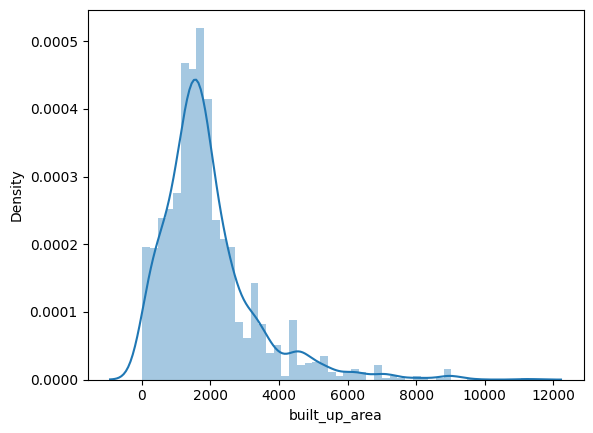

In [344]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

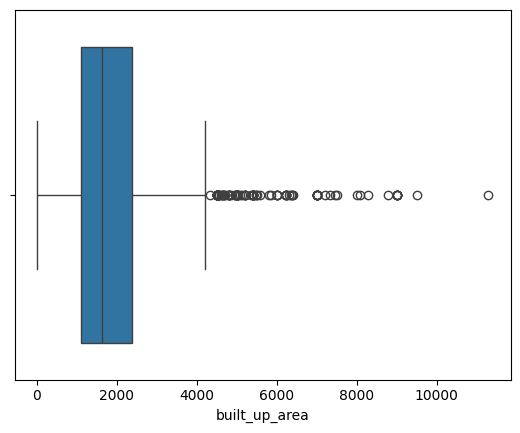

In [345]:
sns.boxplot(x=df['built_up_area'])

<ipython-input-346-becec57fa840>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

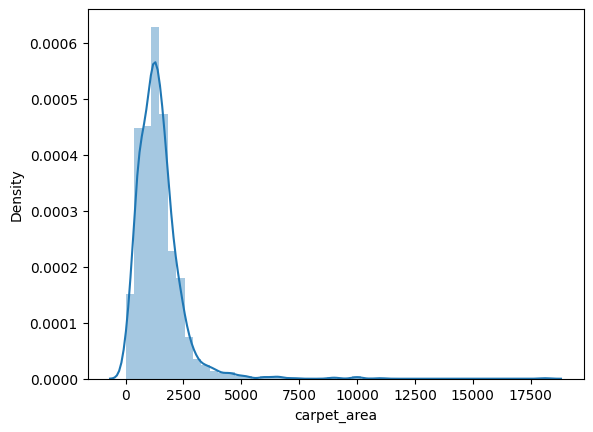

In [346]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

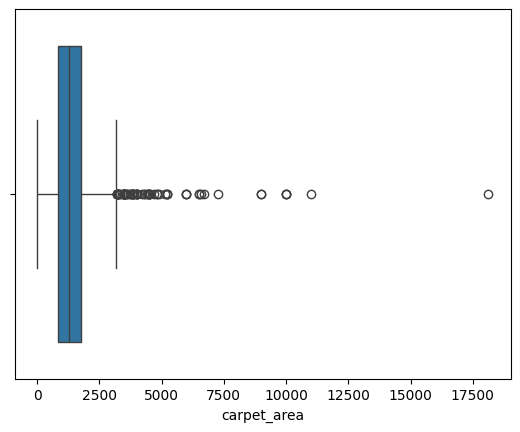

In [347]:
sns.boxplot(x=df['carpet_area'])

In [348]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
94,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60
519,flat,godrej air,sector 85,2.5,1379.0,2160.0,carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44


In [349]:
df.loc[519,'carpet_area'] = 1812

In [350]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
94,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


<ipython-input-351-bd70b6910aad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

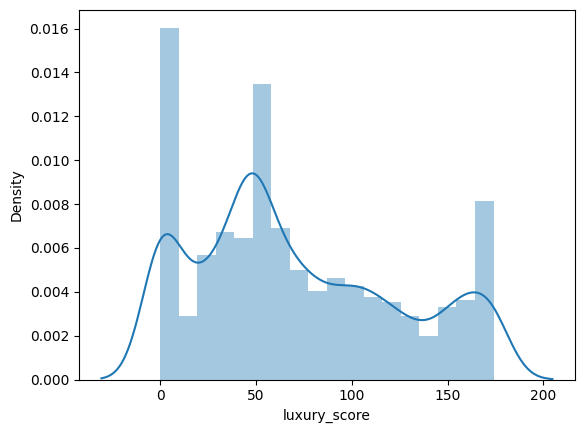

In [351]:
sns.distplot(df['luxury_score'])

<Axes: xlabel='luxury_score'>

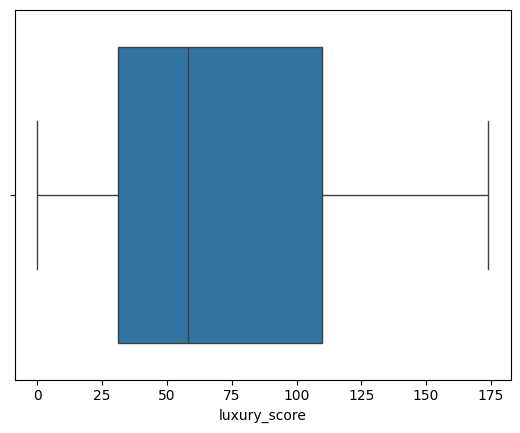

In [352]:
sns.boxplot(x=df['luxury_score']) # no outliers

In [353]:
df.shape

(3733, 23)

In [354]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [355]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ambience lagoon,sector 24,4.25,13281.0,3200.0,super built up area 3200(297.29 sq.m.)carpet a...,3,4,3+,3.0,North-East,Old Property,3200.0,NaN,3156.000000,0,1,0,1,0,1,143
1,flat,capital residences 360,sector 70,1.18,8138.0,1450.0,super built up area 1450(134.71 sq.m.)built up...,2,2,3,7.0,East,New Property,1450.0,1400.0,1000.000000,0,0,0,1,0,0,140
2,flat,umang winter hills,sector 77,0.71,5306.0,1338.0,super built up area 1342(124.68 sq.m.)carpet a...,2,2,2,6.0,North-West,Relatively New,1342.0,NaN,810.000000,1,0,0,0,0,0,108
3,flat,rof ananda,sector 95,0.20,5464.0,366.0,carpet area: 366.08 (34.01 sq.m.),1,1,1,10.0,West,Relatively New,NaN,NaN,366.080239,0,0,0,0,0,0,82
4,flat,shree vardhman flora,sector 90,0.90,4615.0,1950.0,super built up area 1950(181.16 sq.m.),3,4,3,4.0,East,Relatively New,1950.0,NaN,NaN,0,1,0,0,0,0,165


<ipython-input-356-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

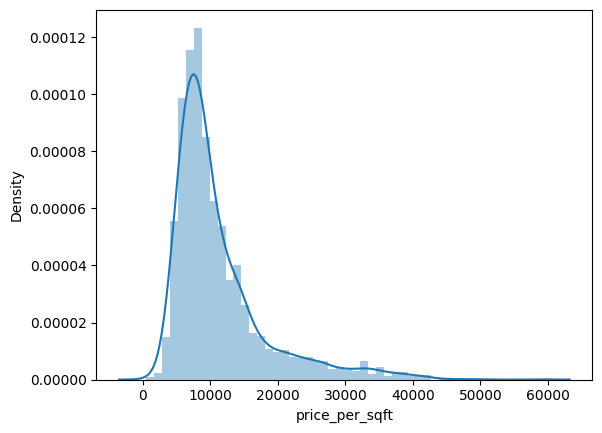

In [356]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

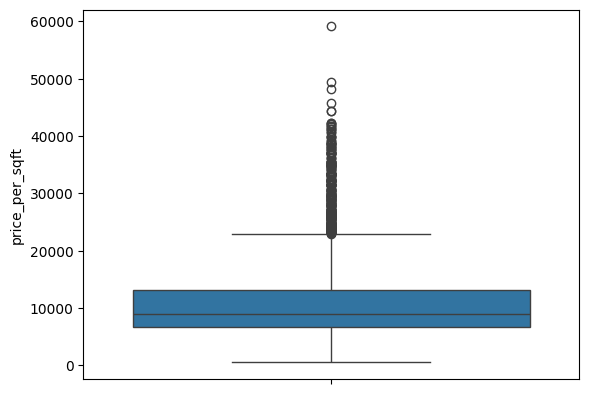

In [357]:
sns.boxplot(df['price_per_sqft'])

In [358]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
654,house,independent,sector 105,9.90,49500.0,2000.000000,built up area: 2000 (185.81 sq.m.)carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
1189,house,sushant lok 1 builder floors,sector 43,13.00,48148.0,2700.008308,plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7
1486,house,independent,sector 26,19.00,42222.0,4500.023684,plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
1505,house,independent,sector 25,13.00,45710.0,2844.016627,plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0
1556,house,independent,sector 43,9.50,42222.0,2250.011842,plot area 302(252.51 sq.m.)built up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
2490,house,independent,sector 26,20.00,44444.0,4500.045000,plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
2497,house,unitech aspen greens,sector 50,6.95,59149.0,1175.000000,plot area 240(200.67 sq.m.)built up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.0,0,1,0,0,0,0,160
2684,house,independent,sector 28,12.00,42194.0,2844.006257,plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,0,60
3781,house,dlf city plots,sector 26,19.00,42054.0,4518.000666,plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
3803,house,independent,sector 55,5.00,44444.0,1125.011250,plot area 125(104.52 sq.m.)built up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,2,44


In [359]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(250.47500000000002)

In [360]:
df[(df['area']/df['bedRoom'])<250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1446,flat,signature global the millennia 3,sector 37,0.50,7143.0,700.000000,carpet area: 700 (65.03 sq.m.),3,3,2,2.0,NaN,Under Construction,NaN,NaN,700.0,0,0,0,0,0,0,31
152,house,rattan garden,sector 7,0.83,17584.0,472.020018,carpet area: 472 (43.85 sq.m.),5,3,2,3.0,East,Undefined,NaN,NaN,472.0,0,0,0,0,0,0,0
2625,house,independent,sector 8,0.49,11250.0,435.555556,plot area 360(33.45 sq.m.),6,3,2,3.0,East,Moderately Old,NaN,360.0,NaN,0,0,0,0,0,0,8
2988,house,independent,sector 41,4.25,26235.0,1619.973318,plot area 180(150.5 sq.m.),10,9,3+,4.0,North,Moderately Old,NaN,1620.0,NaN,1,1,0,0,0,1,36
323,house,shivpuri,sector 7,2.80,12444.0,2250.080360,plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,2,0


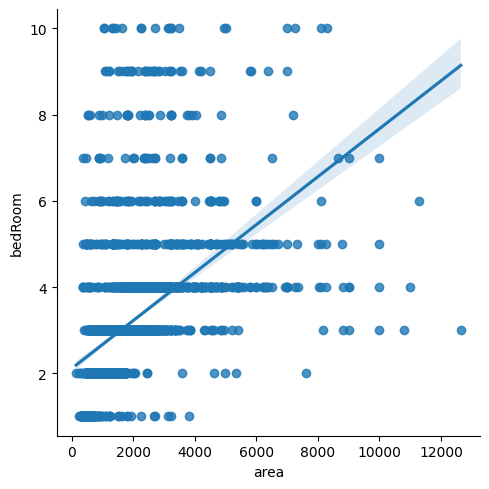

In [361]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [362]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [363]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

,count
bedRoom,
2,49
3,36
5,29
6,20
4,17
9,15
8,13
7,8
10,8


In [382]:
df = df[df['area_room_ratio']>100]

In [383]:
df.shape

(3730, 24)

In [384]:
outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] >3)]

In [385]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

<ipython-input-385-cc709567dc6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [386]:
df.update(outliers_df)

In [387]:
df.shape

(3730, 24)

In [388]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [389]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
314,house,independent,sector 105,1.10,12222.0,900.016364,carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.002727
323,house,shivpuri,sector 7,2.80,12444.0,2250.080360,plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,2,0,225.008036
426,house,independent,sector 17,0.32,5664.0,564.971751,built up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,112.994350
899,house,independent,manesar,1.10,6172.0,1782.242385,plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.780298
1423,house,independent,manesar,0.80,6666.0,1200.120012,plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,0,0,150.015002
1685,house,independent,sector 5,0.85,9444.0,900.042355,carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.008471
2071,house,independent,sector 11,3.50,15555.0,2250.080360,built up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.008036
2417,house,independent,sector 2,0.98,9074.0,1080.008816,carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000980
2677,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.003192,plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,29,120.600638
3011,house,independent,sector 7,1.16,11717.0,990.014509,carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.002902


In [390]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

In [391]:
df.shape

(3717, 24)

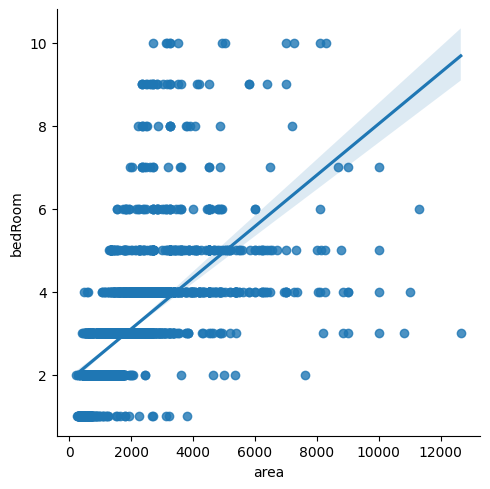

In [393]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [394]:
df.shape

(3717, 24)

In [395]:
df.to_csv('gurgaon_properties_outlier_treated.csv', index = False)